<a href="https://colab.research.google.com/github/Ckiteme/CKiteme-Assignment-Data-Science---Hyperparameter-Tuning-with-Python/blob/main/CKiteme_Assignment_Data_Science_Hyperparameter_Tuning_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

As a Data Scientist working for Airbnb, you have been tasked to create a model that
predicts Airbnb rental prices for the city of Amsterdam. Popularity for Airbnbs in
Amsterdam has grown over the past years and you are required to build a solution the
would make optimal predictions.

### b) Defining the Metric for Success

The metrics we will use to evaluate our model are RMSE and R2 scores.

### c) Understanding the Context 

Airbnb is an American vacation rental online marketplace company based in San
Francisco, California, United States. Airbnb offers arrangement for lodging, primarily
homestays, or tourism experiences. The company does not own any of the real estate
listings, nor does it host events; it acts as a broker, receiving commissions from each
booking.

### d) Recording the Experimental Design

* Defining the Research Question
* Data Importation
* Data Exploration
* Data Cleaning
* Data Analysis (Univariate and Bivariate)
* Data Preparation
* Data Modeling
* Model Evaluation
* Challenging your Solution
* Recommendations / Conclusion 

### e) Data Relevance

The data provided was relevant to answering the research question.

# <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

2.1 Data Preparation

In [1]:
# loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.columns', None)
pd.set_option('display.max_colwidth', None)
%matplotlib inline

In [4]:
# loading and previewing dataset
df = pd.read_csv('https://bit.ly/31fkomB')
df.sample(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11229,21184567,Cosy city house + garden,4593452,Evelien,NaN,Oostelijk Havengebied - Indische Buurt,52.36211,4.94556,Entire home/apt,85,2,18,2018-06-24,0.59,1,0
9365,18271165,Private room with bathroom near citycenter!,126310290,Luuk,NaN,De Pijp - Rivierenbuurt,52.34066,4.90412,Private room,100,1,0,NaN,NaN,1,0
16811,36310994,Canalview apartment in the middle of the centre!!,31027570,Youri,NaN,Centrum-Oost,52.36526,4.88299,Entire home/apt,200,1,26,2020-02-26,2.81,1,0


In [6]:
# loading glossary
glossary = pd.read_csv('https://bit.ly/3klxdEn', header = None)
glossary

,0
0,room_id: A unique number identifying an Airbnb listing.
1,host_id: A unique number identifying an Airbnb host.
2,neighborhood: A subregion of the city or search area for which the survey is carried out. For some cities there is no neighbourhood information.
3,"room_type: One of “Entire home/apt”, “Private room”, or “Shared room”."
4,host_response_rate: The rate at which the particular host responds to the customers.
5,"price: The price (in $US) for a night stay. In early surveys, there may be some values that were recorded by month."
6,accomodates: The number of guests a listing can accommodate.
7,bathrooms: The number of bathrooms a listing offers.
8,bedrooms: The number of bedrooms a listing offers.
9,beds: The number of beds a listing offers.


In [7]:
# dropping the 'name' variable
df.drop(columns = ['name'], inplace = True)

In [8]:
# checking dataset shape
df.shape

(19362, 15)

In [9]:
# checking data types
df.dtypes

id                                  int64
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [10]:
# dropping duplicates, if any
df.drop_duplicates(inplace = True)
df.shape

(19362, 15)

In [11]:
# checking for missing data
df.isna().sum()

id                                    0
host_id                               0
host_name                             4
neighbourhood_group               19362
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        2284
reviews_per_month                  2284
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Neighbourhood group has 100% missing values There are missing records for last review and reviews per month.

Let us drop these columns

In [12]:
# dropping the 'neighbourhood_group' variable, and the records with missing values for 'last_review'
# and 'reviews_per_month'
df.drop(columns = ['neighbourhood_group'], inplace = True)
df.dropna(inplace = True)

# confirming we have no null values
df.isnull().sum()

id                                0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [13]:
df.shape

(17075, 14)

17,075 variables and 14 columns remaining

In [18]:
# get the unique value of each variable to ensure there are no anomalies
cols = df.columns.to_list()

for col in cols:
    print("Variable:", col)
    print("Number of unique variables:", df[col].nunique())
    print('First Five unique values:',df[col].unique()[:5])
    print()

Variable: id
Number of unique variables: 17075
First Five unique values: [ 2818 20168 25428 27886 28871]

Variable: host_id
Number of unique variables: 15182
First Five unique values: [  3159  59484  56142  97647 124245]

Variable: host_name
Number of unique variables: 5382
First Five unique values: ['Daniel' 'Alexander' 'Joan' 'Flip' 'Edwin']

Variable: neighbourhood
Number of unique variables: 22
First Five unique values: ['Oostelijk Havengebied - Indische Buurt' 'Centrum-Oost' 'Centrum-West'
 'Zuid' 'De Pijp - Rivierenbuurt']

Variable: latitude
Number of unique variables: 5720
First Five unique values: [52.36575 52.36509 52.37297 52.38761 52.36719]

Variable: longitude
Number of unique variables: 9193
First Five unique values: [4.94142 4.89354 4.88339 4.89188 4.89092]

Variable: room_type
Number of unique variables: 4
First Five unique values: ['Private room' 'Entire home/apt' 'Hotel room' 'Shared room']

Variable: price
Number of unique variables: 422
First Five unique values: [ 5

There are no missing values

For our analysis, we will check the assumptions of multiple linear regression which include:

** There must be a linear relationship between the independent variables and the target variable.

** Few or no outliers.

** Homoscedasticity - variance of error terms must be similar across the independent variables.

** All residuals must be normally distributed.

** Little to no multicollinearity.
 

2.2 Checking linearity

In [19]:
numerical_train = df.select_dtypes(include = ['int','float'])
numerical_train.head(2)

null_series = numerical_train.isnull().sum()
print(null_series.shape)

full_cols_series = null_series[null_series == 0]
print(full_cols_series.shape)

(10,)
(10,)


In [20]:
df.head(1)

,id,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,2.06,1,169


In [21]:
# create list to store column names to test against 'price'
train_subset = df[full_cols_series.index]

corr = train_subset.corr()

SalePrice_corr = corr ['price']
SalePrice_corr

# '''
# Select just the Price column from the resulting data frame, compute the absolute value of each term, 
# sort the resulting Series by the correlation values, and assign to sorted_corrs.
# '''

ab = SalePrice_corr.abs()

sorted_corrs = ab.sort_values(ascending=False)
print(sorted_corrs)

price                             1.000000
availability_365                  0.132741
minimum_nights                    0.035343
id                                0.025537
calculated_host_listings_count    0.025464
number_of_reviews                 0.024397
latitude                          0.019567
host_id                           0.019220
reviews_per_month                 0.015244
longitude                         0.013304
Name: price, dtype: float64


There is a low co-relationship between price and the rest of the features

2.3 Checking for outliers

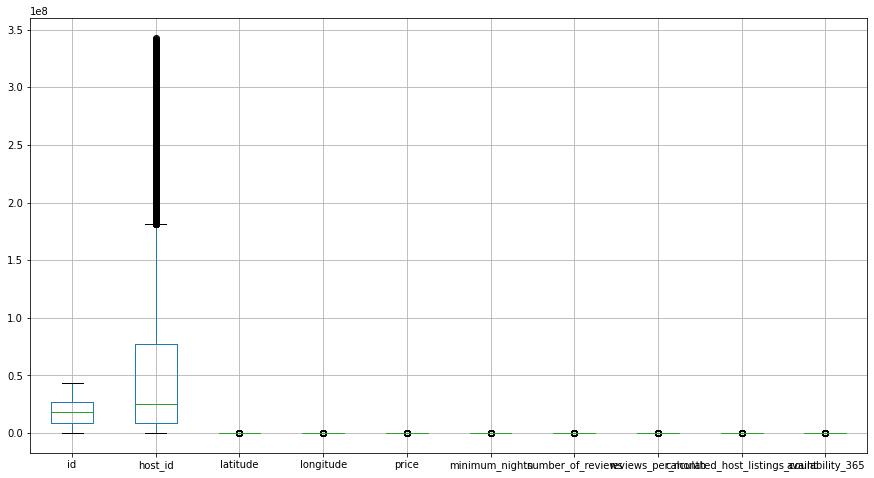

In [15]:
# visualizing the distribution of outliers
plt.figure(figsize = (15, 8))
df.boxplot()
plt.show()

host_id has the most outliers in the dataset

In [16]:
# getting the records with outliers
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

outliers_df = df[((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis = 1)]
print(outliers_df.shape)
outliers_df.sample(3)

(8544, 14)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


,id,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9730,18824672,130861436,Coen,Centrum-West,52.36572,4.88067,Private room,108,1,204,2020-03-19,5.92,1,300
15069,30551447,25066435,Christian,Slotervaart,52.35538,4.84073,Entire home/apt,295,2,4,2020-01-05,0.26,2,0
11513,21638936,52752092,Maxim,Oostelijk Havengebied - Indische Buurt,52.36547,4.94213,Entire home/apt,440,2,10,2020-01-01,0.35,4,0


In [17]:
# calculating percentage of outliers
round((outliers_df.shape[0] / df.shape[0]) * 100, 2)

50.04

It would be tricky to drop the records with outliers since that will reduce our dataset by half so we will leave them there. However, we will drop the host_id variable later on, right before modeling.

2.4 Checking multicollinearity

In [22]:
# checking the correlations between the numerical variables
cor = df.corr()
cor

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.506430,-0.009528,0.012507,0.025537,-0.029400,-0.286196,0.075540,0.086298,-0.001456
host_id,0.506430,1.000000,-0.011259,0.027041,0.019220,-0.012490,-0.107797,0.126118,0.024235,0.102491
latitude,-0.009528,-0.011259,1.000000,-0.143365,0.019567,-0.017351,0.036669,0.030088,0.022713,0.040589
longitude,0.012507,0.027041,-0.143365,1.000000,0.013304,-0.002961,0.003264,0.012546,0.012186,0.021006
price,0.025537,0.019220,0.019567,0.013304,1.000000,0.035343,-0.024397,-0.015244,0.025464,0.132741
minimum_nights,-0.029400,-0.012490,-0.017351,-0.002961,0.035343,1.000000,-0.017258,-0.024594,-0.007350,0.041135
number_of_reviews,-0.286196,-0.107797,0.036669,0.003264,-0.024397,-0.017258,1.000000,0.738433,0.002123,0.306629
reviews_per_month,0.075540,0.126118,0.030088,0.012546,-0.015244,-0.024594,0.738433,1.000000,0.039661,0.325249
calculated_host_listings_count,0.086298,0.024235,0.022713,0.012186,0.025464,-0.007350,0.002123,0.039661,1.000000,0.126483
availability_365,-0.001456,0.102491,0.040589,0.021006,0.132741,0.041135,0.306629,0.325249,0.126483,1.000000


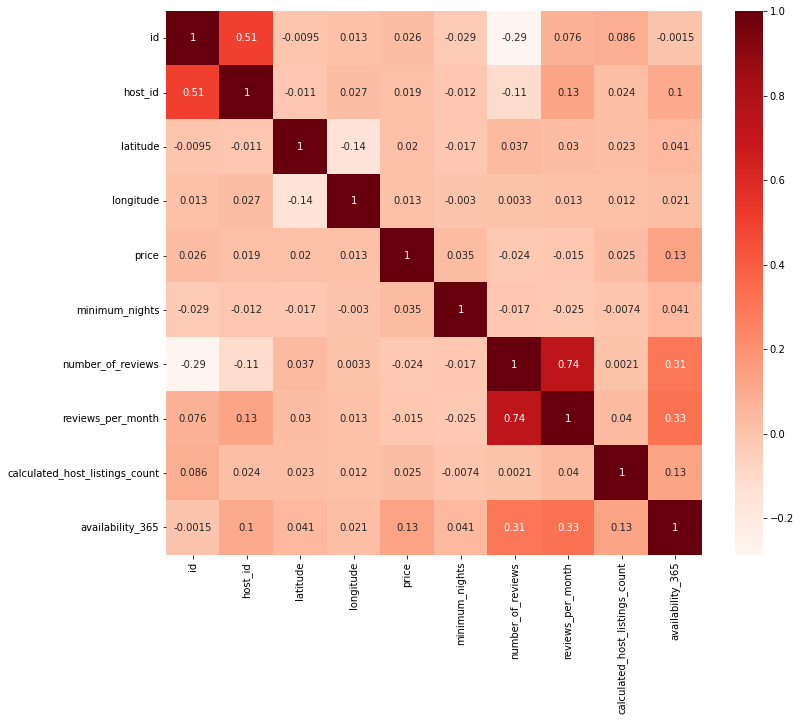

In [23]:
# plotting the correlations onto a heatmap
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

** Reviews per month and number of reviews are strongly correlated hence will drop reviews per month

**The rest of the variables are not strongly correlated hence we will not drop any other columns

In [ ]:
df.drop(columns = ['reviews_per_month'], inplace = True)

In [25]:
df.shape

(17075, 13)

In [27]:
# check VIF scores

features = numerical_train.drop(['price'], axis =1 )
features

unit_train = features/(features.max())
sorted_vars = unit_train.var().sort_values(ascending = False)
print(sorted_vars)

availability_365                  7.320372e-02
id                                7.170868e-02
host_id                           4.744645e-02
calculated_host_listings_count    8.246591e-03
number_of_reviews                 4.525346e-03
reviews_per_month                 5.226424e-04
minimum_nights                    2.436060e-04
longitude                         5.022745e-05
latitude                          9.661556e-08
dtype: float64


There is no any VIF score of above 5, which means our dataset does not have high levels of multicollinearity.

# <font color='#2F4F4F'>3. Data Analysis</font>

## 3.1 Univariate Analysis 

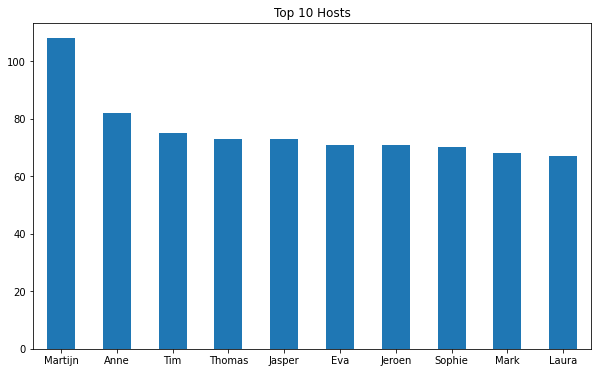

In [28]:
# getting the top 10 most common hosts
plt.figure(figsize = (10, 6))
df.host_name.value_counts()[:10].plot(kind = 'bar', rot = 0)
plt.title("Top 10 Hosts")
plt.show()

The top host is Martijin

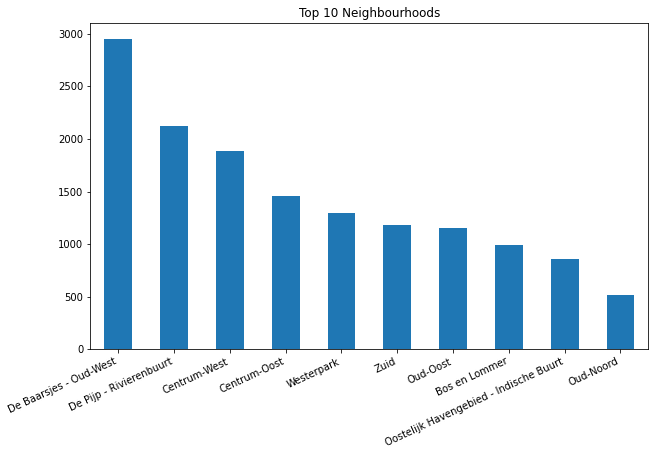

In [29]:
# getting the top 10 most common neighbourhoods
plt.figure(figsize = (10, 6))
df.neighbourhood.value_counts()[:10].plot(kind = 'bar', rot = 25)
plt.xticks(ha = "right")
plt.title("Top 10 Neighbourhoods")
plt.show()

The top neighbourhood is De Baarsjes

In [30]:
df.room_type.value_counts()

Entire home/apt    13308
Private room        3497
Hotel room           232
Shared room           38
Name: room_type, dtype: int64

Most rented room type is the entire home or apartment

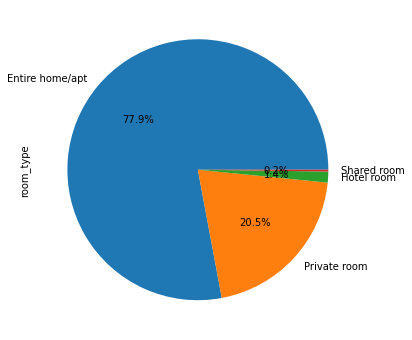

In [31]:
# getting the most common room types
plt.figure(figsize = (6, 6))
labels = ['Entire home/apt', 'Private room', 'Hotel room', 'Shared room']
df.room_type.value_counts().plot(kind = 'pie', autopct = '%0.1f%%', labels = labels)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


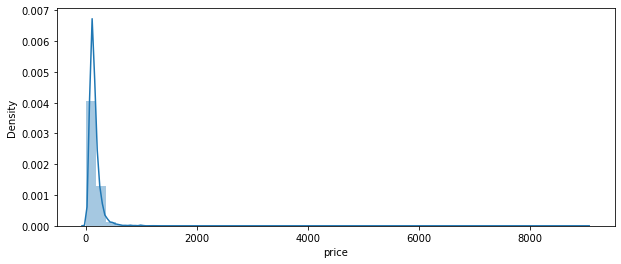

In [32]:
# distribution of price
plt.figure(figsize = (10,4))
sns.distplot(df['price'])
plt.show()

Price paid for rooms mostly lies below 2000


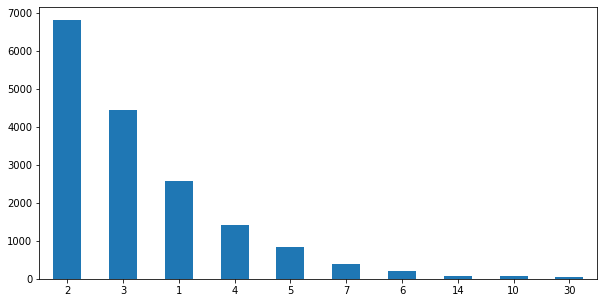

In [33]:
# getting the top 10 most common minimum number of nights to spend
plt.figure(figsize = (10, 5))
df.minimum_nights.value_counts()[:10].plot(kind = 'bar', rot = 0)
plt.show()

most customers spend 2 nights

## 3.2 Bivariate Analysis

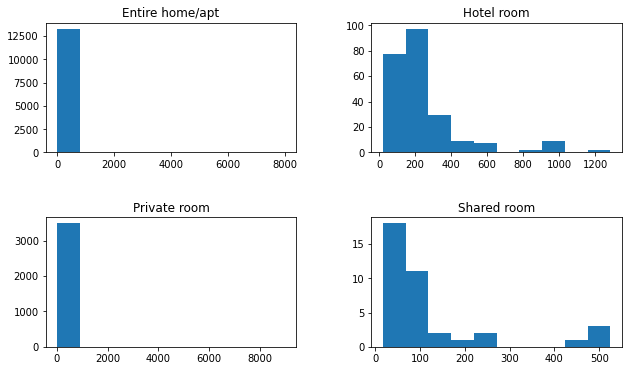

In [34]:
# price by room type
df.hist('price', by = 'room_type', rot = 0, figsize = (10, 6))
plt.show()

** Hotel and shared rooms have a wider distribution of their prices

In [35]:
# average price by neighbourhood
df.groupby('neighbourhood')['price'].mean().sort_values(ascending = False)

neighbourhood
Centrum-West                              203.653397
Centrum-Oost                              190.534247
Zuid                                      178.813243
Oud-Noord                                 168.763566
De Pijp - Rivierenbuurt                   166.601787
IJburg - Zeeburgereiland                  157.723077
Westerpark                                151.241140
De Baarsjes - Oud-West                    149.376228
Oud-Oost                                  144.606957
Watergraafsmeer                           141.199125
Buitenveldert - Zuidas                    137.690355
Oostelijk Havengebied - Indische Buurt    135.101163
Noord-Oost                                130.495833
Noord-West                                126.318885
Bos en Lommer                             122.525304
De Aker - Nieuw Sloten                    121.268908
Slotervaart                               119.791549
Geuzenveld - Slotermeer                   113.937143
Osdorp                          

# Centrum-west is highest priced neighbourhood while Biljmer-Oost is the chepeast neighborhood

In [36]:
# average price by neighbourhood
df.groupby('minimum_nights')['price'].mean().sort_values(ascending = False)

minimum_nights
365     3000.000000
99       999.000000
200      999.000000
52       429.000000
30       331.551020
222      300.000000
27       275.000000
48       250.000000
31       243.750000
150      203.000000
21       201.761905
15       197.888889
1000     185.000000
240      180.000000
28       175.900000
7        174.760526
300      170.500000
180      169.250000
3        166.936544
14       163.476923
38       159.000000
4        158.828311
45       157.500000
5        155.676190
1        154.149670
60       152.071429
2        151.557365
24       150.000000
22       150.000000
6        146.276923
59       146.250000
40       139.000000
9        136.250000
41       131.000000
20       130.185185
1001     130.000000
16       129.666667
100      127.000000
90       126.250000
10       125.709677
18       125.000000
8        120.730769
29       120.000000
999      120.000000
25       118.555556
12       118.083333
500      110.000000
50       110.000000
17       109.500000
95   

## 3.3 Feature Engineering

In [39]:
# getting the average price per room type

avg_price_per_room = df.groupby('room_type')['price'].mean().to_dict()

# adding to our dataset

df['avg_price_per_room'] = df['room_type'].map(avg_price_per_room)

# previewing our modified dataset

df.head()

,id,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,avg_price_per_room
0,2818,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,1,169,109.421504
1,20168,59484,Alexander,Centrum-Oost,52.36509,4.89354,Private room,100,1,340,2020-04-09,2,106,109.421504
2,25428,56142,Joan,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,5,2020-02-09,1,132,169.179967
3,27886,97647,Flip,Centrum-West,52.38761,4.89188,Private room,155,2,217,2020-03-02,1,172,109.421504
4,28871,124245,Edwin,Centrum-West,52.36719,4.89092,Private room,75,2,332,2020-03-16,3,210,109.421504


In [40]:
# getting the average price per neighbourhood

avg_price_per_neighbourhood = df.groupby('neighbourhood').price.transform('mean')

# adding to our dataset

df['avg_price_per_neighbourhood'] = avg_price_per_neighbourhood

# previewing our modified dataset

df.head()

,id,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,avg_price_per_room,avg_price_per_neighbourhood
0,2818,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,1,169,109.421504,135.101163
1,20168,59484,Alexander,Centrum-Oost,52.36509,4.89354,Private room,100,1,340,2020-04-09,2,106,109.421504,190.534247
2,25428,56142,Joan,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,5,2020-02-09,1,132,169.179967,203.653397
3,27886,97647,Flip,Centrum-West,52.38761,4.89188,Private room,155,2,217,2020-03-02,1,172,109.421504,203.653397
4,28871,124245,Edwin,Centrum-West,52.36719,4.89092,Private room,75,2,332,2020-03-16,3,210,109.421504,203.653397


In [41]:
# encoding 'room_type'
# YOUR CODE HERE
# trying nominal encoding
# sort the dictionary of average price per room type based on values
sorted(avg_price_per_room.items(), key=lambda x: x[1])

[('Private room', 109.42150414641121),
 ('Shared room', 123.0),
 ('Entire home/apt', 169.17996693718064),
 ('Hotel room', 245.85344827586206)]

In [42]:

# assign the numbers based on the average values
room_type_map = {'Private room':1,'Shared room':2,'Entire home/apt':3,'Hotel room':4}

# create a new column in the dataframe
df['room_type_encode'] = df['room_type'].map(room_type_map)
df.head()

,id,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,avg_price_per_room,avg_price_per_neighbourhood,room_type_encode
0,2818,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,1,169,109.421504,135.101163,1
1,20168,59484,Alexander,Centrum-Oost,52.36509,4.89354,Private room,100,1,340,2020-04-09,2,106,109.421504,190.534247,1
2,25428,56142,Joan,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,5,2020-02-09,1,132,169.179967,203.653397,3
3,27886,97647,Flip,Centrum-West,52.38761,4.89188,Private room,155,2,217,2020-03-02,1,172,109.421504,203.653397,1
4,28871,124245,Edwin,Centrum-West,52.36719,4.89092,Private room,75,2,332,2020-03-16,3,210,109.421504,203.653397,1


In [43]:
# dropping columns not required in preparation for modeling
# YOUR CODE HERE
df.drop(columns=['host_id','host_name','neighbourhood','room_type','last_review'],inplace=True)
print(df.shape)
df.head()

(17075, 11)


,id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,avg_price_per_room,avg_price_per_neighbourhood,room_type_encode
0,2818,52.36575,4.94142,59,3,278,1,169,109.421504,135.101163,1
1,20168,52.36509,4.89354,100,1,340,2,106,109.421504,190.534247,1
2,25428,52.37297,4.88339,125,14,5,1,132,169.179967,203.653397,3
3,27886,52.38761,4.89188,155,2,217,1,172,109.421504,203.653397,1
4,28871,52.36719,4.89092,75,2,332,3,210,109.421504,203.653397,1


# <font color='#2F4F4F'>4. Data Modeling</font>

In [44]:
# split into features (X) and label (Y)
# YOUR CODE HERE
X = df.drop('price',axis=1).values
y = df['price'].values

In [45]:
# split into 70-30 train and test sets
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

#confirm size of datasets
print(df.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17075, 11)
(11952, 10)
(5123, 10)
(11952,)
(5123,)


In [46]:
# scaling our features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

For purposes of simplicity, we will work with the following regressors:
* Decision Tree Regressor
* Random Forest Regressor

We will work with the following regressors:

Decision Tree Regressor
Random Forest Regressor

## 4.1 Normal Modeling

In [49]:
# loading our regressors

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# import the scoring metrics
from sklearn.metrics import mean_squared_error, r2_score

# instantiating our regressors

dt_model = DecisionTreeRegressor(random_state=1)
rf_model = RandomForestRegressor(random_state=1)

# fitting to our training data

dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# making predictions

dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# evaluating the RMSE and R2 scores
# calculate RMSE
dt_rmse = np.sqrt(mean_squared_error(y_test,dt_pred))
rf_rmse = np.sqrt(mean_squared_error(y_test,rf_pred))
print('Decision Tree RMSE:', dt_rmse)
print('Random Forest RMSE:', rf_rmse)

# calculate R2 Score
dt_r2 = r2_score(y_test,dt_pred)
rf_r2 = r2_score(y_test,rf_pred)
print('Decision Tree R2 Score:', dt_r2)
print('Random Forest R2 Score:', rf_r2)

Decision Tree RMSE: 179.7519100605275
Random Forest RMSE: 156.1687116005595
Decision Tree R2 Score: -0.4446962971443218
Random Forest R2 Score: -0.09047970303692954


** R2 score is far from 1 hence this models need improvement

** Random forest has a lower RMSE hence a better fit

In [50]:
# 10% of target variable's mean


mean_price = y.mean()
mean_price * 0.1

15.788029282576867

Both models give an RMSE that is lower than 10% of the mean price indicating lower accuracy.

## 4.2 Modeling with Grid Search

In [51]:
# setting our grid parameters

from sklearn.model_selection import GridSearchCV
dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(random_state=42)

# grid parameters for decision trees
dt_grid_param = {
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_leaf': [10, 20, 30, 40, 50]
}

# grid parameters for random forest
rf_grid_param = {
    'max_depth': [10, 20, 30, 40, 50,None],
    "n_estimators": [10, 20, 30, 40, 50],
    'min_samples_leaf': [10, 20, 30, 40, 50]
}
# setting up the Grid Search with our regressors with cv = 5 and n_jobs = -1
# decision tree Grid Search
gd_sr_dt = GridSearchCV(estimator = dt_model,
                     param_grid = dt_grid_param,
                     scoring = ['neg_root_mean_squared_error','r2'],
                     cv = 5,
                     refit = 'neg_root_mean_squared_error',
                     verbose = 2,
                     n_jobs =-1)
# Random forest Grid Search
gd_sr_rf = GridSearchCV(estimator = rf_model,
                     param_grid = rf_grid_param,
                     scoring = ['neg_root_mean_squared_error','r2'],
                     cv = 5,
                     refit = 'neg_root_mean_squared_error',
                     verbose = 2,
                     n_jobs =-1)
# fitting to training data

gd_sr_dt.fit(X_train, y_train)
gd_sr_rf.fit(X_train, y_train)

# getting the best parameters
best_parameters_dt = gd_sr_dt.best_params_
best_parameters_rf = gd_sr_rf.best_params_
print('Decision Tree Best Parameters')
print(best_parameters_dt)
print('Random Forest Best Parameters')
print(best_parameters_rf)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 150 candidates, totalling 750 fits
Decision Tree Best Parameters
{'max_depth': 10, 'min_samples_leaf': 50}
Random Forest Best Parameters
{'max_depth': 10, 'min_samples_leaf': 10, 'n_estimators': 10}


In [62]:
# get the score for decision tree
best_result_dt = gd_sr_dt.best_score_
print(best_result_dt)

-149.30996737098582


The RMSE from decision tree reduced from 183.24 to 149.

In [60]:
# get the score for random forest
best_result_rf = gd_sr_rf.best_score_
print(best_result_rf)

-144.55460468752764


random forest RMSE increased slightly to 144.55

In [61]:
# implementing this recommendation

# instantiating our regressors with the recommended parameters
# YOUR CODE HERE
dt_model = DecisionTreeRegressor(random_state=1,max_depth=10, min_samples_leaf=40)
rf_model = RandomForestRegressor(random_state=1,max_depth=20, min_samples_leaf=50, n_estimators=20)

# fitting to our training data
# YOUR CODE HERE
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# making predictions
# YOUR CODE HERE
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# evaluating the RMSE and R2 scores
# YOUR CODE HERE
# calculate RMSE
dt_rmse = np.sqrt(mean_squared_error(y_test,dt_pred))
rf_rmse = np.sqrt(mean_squared_error(y_test,rf_pred))
print('Decision Tree RMSE:', dt_rmse)
print('Random Forest RMSE:', rf_rmse)
# calculate R2 Score
dt_r2 = r2_score(y_test,dt_pred)
rf_r2 = r2_score(y_test,rf_pred)
print('Decision Tree R2 Score:', dt_r2)
print('Random Forest R2 Score:', rf_r2)

Decision Tree RMSE: 146.74057370236878
Random Forest RMSE: 142.65951933772624
Decision Tree R2 Score: 0.03721357738628961
Random Forest R2 Score: 0.09002168178832515


## 4.3 Modeling with Random Search

In [63]:
# setting up our parameters and the respective distributions to sample from
# YOUR CODE HERE
from scipy.stats import randint as sp_randint
# grid parameters for decision trees
dt_random_param = {
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_leaf': sp_randint(1, 50)
}
# grid parameters for random forest
rf_random_param = {
    'max_depth': [10, 20, 30, 40, 50,None],
    "n_estimators": sp_randint(1, 50),
    'min_samples_leaf': sp_randint(1, 50)
}

# setting up Randomized Search for each regressor   with cv = 5
# YOUR CODE HERE
from sklearn.model_selection import RandomizedSearchCV 
dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(random_state=42)
random_dt = RandomizedSearchCV(dt_model, 
                               dt_random_param, 
                               cv = 5,
                               scoring = ['neg_root_mean_squared_error','r2'],
                               refit = 'neg_root_mean_squared_error',
                               n_jobs=-1,
                               random_state=1
                               )
random_rf = RandomizedSearchCV(rf_model,                                
                               rf_random_param, 
                               cv = 5,
                               scoring = ['neg_root_mean_squared_error','r2'],
                               refit = 'neg_root_mean_squared_error',
                               n_jobs=-1,
                               random_state=1
                               )
# fitting to training data
# YOUR CODE HERE
random_dt.fit(X_train, y_train)
random_rf.fit(X_train, y_train)

# getting the best parameters
# YOUR CODE HERE
best_parameters_dt = random_dt.best_params_
print('Decision Tree Best Parameters (Random Search): ',best_parameters_dt)

best_parameters_rf = random_rf.best_params_
print('Random Forest Best Parameters (Random Search): ',best_parameters_rf)

# And lastly obtaining our accuracy
best_result_dt = random_dt.best_score_
print('Decision Tree Accuracy (Random Search): ',best_result_dt)

best_result_rf = random_rf.best_score_
print('Random Forest Accuracy (Random Search): ',best_result_rf)

Decision Tree Best Parameters (Random Search):  {'max_depth': None, 'min_samples_leaf': 44}
Random Forest Best Parameters (Random Search):  {'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 13}
Decision Tree Accuracy (Random Search):  -150.07364512996918
Random Forest Accuracy (Random Search):  -143.37683328881448


In [64]:
# implementing this recommendation

# instantiating our regressors using the recommended parameters
# instantiating our regressors with the recommended parameters
# YOUR CODE HERE
dt_model = DecisionTreeRegressor(random_state=1,max_depth=None, min_samples_leaf=44)
rf_model = RandomForestRegressor(random_state=1,max_depth=50, min_samples_leaf=43, n_estimators=29)

# fitting to our training data
# YOUR CODE HERE
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# making predictions
# YOUR CODE HERE
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# evaluating the RMSE and R2 scores
# YOUR CODE HERE
# calculate RMSE
dt_rmse = np.sqrt(mean_squared_error(y_test,dt_pred))
rf_rmse = np.sqrt(mean_squared_error(y_test,rf_pred))
print('Decision Tree RMSE after Random Search:', dt_rmse)
print('Random Forest RMSE after Random Search:', rf_rmse)

# calculate R2 Score
dt_r2 = r2_score(y_test,dt_pred)
rf_r2 = r2_score(y_test,rf_pred)
print('Decision Tree R2 Score after Random Search:', dt_r2)
print('Random Forest R2 Score after Random Search:', rf_r2)

Decision Tree RMSE after Random Search: 146.03756150517378
Random Forest RMSE after Random Search: 142.761606610005
Decision Tree R2 Score after Random Search: 0.04641661150608367
Random Forest R2 Score after Random Search: 0.08871885329949625


## 4.4 Modeling with Bayesian Optimization

In [65]:
# importing the hyperopt library and cross_val_score
# YOUR CODE HERE
from hyperopt import hp, fmin, tpe, STATUS_OK

# setting up a space dictionary
# YOUR CODE HERE
dt_space = {'max_depth': hp.quniform('max_depth', 10, 1200, 10), 
        'min_samples_leaf': hp.uniform ('min_samples_leaf', 0, 0.5)}
def dt_objective(space): 
    model = DecisionTreeRegressor(max_depth = space['max_depth'],
                                 min_samples_leaf = space['min_samples_leaf'])
    # print(classifier)
    model.fit(X_train, y_train) 
    y_pred = model.predict(X_test) 
    rmse = np.sqrt(mean_squared_error(y_test,y_pred=y_pred))
    # We aim to maximize accuracy; in this case we return it as a negative value
    return {'loss': -rmse, 'status': STATUS_OK }

# 3. Running our bayesian optimizer
# ---
#
best_dt = fmin(fn= dt_objective,                        # the objective function to miminize / the loss function to minimize
            space = dt_space,                        # the range of input values to test during optimisation
            algo= tpe.suggest,                    # the search algorithm to use
            max_evals = 80,                       # the no. of iteration to perform
            rstate=np.random.RandomState(42))     # the randomstate for reproducability / to get the same result when we run the code

# printing out our outcome
best_dt

100%|██████████| 80/80 [00:04<00:00, 17.89it/s, best loss: -155.13285240963924]


{'max_depth': 700.0, 'min_samples_leaf': 0.0010984228260685481}

In [67]:
# importing the hyperopt library and cross_val_score
# YOUR CODE HERE
from hyperopt import hp, fmin, tpe, STATUS_OK

# setting up a space dictionary
# YOUR CODE HERE
rf_space = {'max_depth': hp.quniform('max_depth', 10, 1200, 10), 
        'min_samples_leaf': hp.uniform ('min_samples_leaf', 0, 0.5),
        "n_estimators": hp.choice ('n_estimators', range(10,1200))
        }
def rf_objective(space): 
    model = RandomForestRegressor(max_depth = space['max_depth'],
                                 min_samples_leaf = space['min_samples_leaf'],
                                  n_estimators = space['n_estimators'])
    # print(classifier)
    model.fit(X_train, y_train) 
    y_pred = model.predict(X_test) 
    rmse = np.sqrt(mean_squared_error(y_test,y_pred=y_pred))
    # We aim to maximize accuracy; in this case we return it as a negative value
    return {'loss': -rmse, 'status': STATUS_OK }
# 3. Running our bayesian optimizer
# ---
#
best_rf = fmin(fn= rf_objective,                        # the objective function to miminize / the loss function to minimize
            space = rf_space,                        # the range of input values to test during optimisation
            algo= tpe.suggest,                    # the search algorithm to use
            max_evals = 80,                       # the no. of iteration to perform
            rstate=np.random.RandomState(42))     # the randomstate for reproducability / to get the same result when we run the code

# printing out our outcome
best_rf

100%|██████████| 80/80 [03:23<00:00,  2.54s/it, best loss: -149.5587604615619]


{'max_depth': 600.0,
 'min_samples_leaf': 0.34051956233035696,
 'n_estimators': 36}

In [68]:
# implementing this recommendation

# instantiating our regressors with the recommended parameters
# YOUR CODE HERE
dt_model = DecisionTreeRegressor(random_state=1,max_depth=370, min_samples_leaf=0.50)
rf_model = RandomForestRegressor(random_state=1,max_depth=650, min_samples_leaf=0.33, n_estimators=123)

# fitting to our training data
# YOUR CODE HERE
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# making predictions
# YOUR CODE HERE
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# evaluating the RMSE and R2 scores
# YOUR CODE HERE
# calculate RMSE
dt_rmse = np.sqrt(mean_squared_error(y_test,dt_pred))
rf_rmse = np.sqrt(mean_squared_error(y_test,rf_pred))
print('Decision Tree RMSE after Bayesian Optimization:', dt_rmse)
print('Random Forest RMSE after Bayesian Optimization:', rf_rmse)

# calculate R2 Score
dt_r2 = r2_score(y_test,dt_pred)
rf_r2 = r2_score(y_test,rf_pred)
print('Decision Tree R2 Score after Bayesian Optimization:', dt_r2)
print('Random Forest R2 Score after Bayesian Optimization:', rf_r2)

Decision Tree RMSE after Bayesian Optimization: 149.45909990937437
Random Forest RMSE after Bayesian Optimization: 149.5587488222559
Decision Tree R2 Score after Bayesian Optimization: 0.0012098361716479378
Random Forest R2 Score after Bayesian Optimization: -0.0001224551825498299


# <font color='#2F4F4F'>5. Summary of Findings</font>

Summarize your findings.

Our best model is Random Forest that has been optimized using Random Search with an RMSE of 143.48

# <font color='#2F4F4F'>6. Recommendations</font>

Provide your recommendations.

The Airbnb should use random forest predictions to predict rental prices

# <font color='#2F4F4F'>7. Challenging your Solution</font>

### a) Did we have the right question? yes

### b) Did we have the right data? yes


### c) What can be done to improve the solution?
More hyperparameter tuning can be done on the models to improve on the performance.
